In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log
import re

In [134]:
raw_df = pd.read_excel("/Users/lorenzo/Desktop/Programmazione/python/16 marzo ATLETI/data/Dati infortuni.xlsx")

In [135]:
#DATAFRAME CORRETTAMENTE ESPORTATO
raw_df.head(5)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Unnamed: 7
0,24,66.251933,175.732429,1,0.457929,5,0,NaN
1,37,70.996271,174.58165,0,0.226522,6,1,NaN
2,32,80.093781,186.329618,0,0.61397,2,1,NaN
3,28,87.473271,175.50424,one,0.252858,4,1,NaN
4,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,NaN


In [136]:
df = raw_df.copy()

In [137]:
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Unnamed: 7
0,24,66.251933,175.732429,1,0.457929,5,0,NaN
1,37,70.996271,174.58165,0,0.226522,6,1,NaN
2,32,80.093781,186.329618,0,0.61397,2,1,NaN
3,28,87.473271,175.50424,one,0.252858,4,1,NaN
4,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,NaN
...,...,...,...,...,...,...,...,...
995,23,99.14791,165.290912,0,0.077857,3,1,NaN
996,23,75.799934,178.132281,1,0.955448,1,0,NaN
997,20,78.479061,173.823908,0,0.246961,1,1,NaN
998,24,66.915802,197.616889,1,0.859645,2,0,NaN


In [138]:
df.dtypes

Player_Age               object
Player_Weight            object
Player_Height            object
Previous_Injuries        object
Training_Intensity       object
Recovery_Time            object
Likelihood_of_Injury     object
Unnamed: 7              float64
dtype: object

In [139]:
df["Unnamed: 7"].value_counts(dropna=False)

NaN    999
1.0      1
Name: Unnamed: 7, dtype: int64

In [140]:
#ENTRATA 832 HA TUTTO SPOSTATO DI UNA COLONNA A DESTRA
df.loc[df["Unnamed: 7"]==1]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Unnamed: 7
832,NaN,36,66.462635,196.774629,0,0.131687,1,1.0


In [141]:
for idx,i in enumerate(df.columns):
    if idx!=0:
        df.loc[832,df.columns[idx-1]]=df.loc[832,df.columns[idx]]

print(df.loc[832])

Player_Age                      36
Player_Weight            66.462635
Player_Height           196.774629
Previous_Injuries                0
Training_Intensity        0.131687
Recovery_Time                    1
Likelihood_of_Injury           1.0
Unnamed: 7                     1.0
Name: 832, dtype: object


In [142]:
df=df.drop(['Unnamed: 7'],axis=1)
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.58165,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.61397,2,1
3,28,87.473271,175.50424,one,0.252858,4,1
4,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ
...,...,...,...,...,...,...,...
995,23,99.14791,165.290912,0,0.077857,3,1
996,23,75.799934,178.132281,1,0.955448,1,0
997,20,78.479061,173.823908,0,0.246961,1,1
998,24,66.915802,197.616889,1,0.859645,2,0


In [143]:
df.isnull().sum()

Player_Age              10
Player_Weight            2
Player_Height            2
Previous_Injuries        6
Training_Intensity       2
Recovery_Time            2
Likelihood_of_Injury     2
dtype: int64

In [144]:
df.loc[df.duplicated()]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
223,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ


In [145]:
df.loc[df["Player_Age"] == "ඞ"]


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
4,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ
113,ඞ,ඞ,ඞ,ඞ,ඞ,,ඞ
223,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ,ඞ


In [146]:
df = df.drop(df[df['Player_Age'] == "ඞ"].index)

In [147]:
#TUTTE LE ENTRIES CON ENTRATE NON NUMERICHE
df[~df.applymap(np.isreal).all(1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
3,28,87.473271,175.50424,one,0.252858,4,1
6,24,70.12605,177.044588,#,0.823552,2,0
7,36',79.038206,181.523155,1,0.820696,3,1
81,32',63.928955,177.330853,1,0.677438,6,1
90,18,73.50122,176.963385,one,0.37904,2,0
122,20,82.563516,160.638847,one,0.222676,1,1
125,31,53.301223,166.832512,zero,0.417193,2,1
135,37',70.81857,157.230088,1,0.661719,6,0
136,21,62.115526,181.408284,zero,0.602449,2,0
139,30,80.518637,179.365539,zero,0.023708,5,1


In [148]:
df["Previous_Injuries"] = df["Previous_Injuries"].replace("one",1)
df["Previous_Injuries"] = df["Previous_Injuries"].replace("zero",0)
df["Previous_Injuries"] = df["Previous_Injuries"].replace("#",None)
df[~df.applymap(np.isreal).all(1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
7,36',79.038206,181.523155,1,0.820696,3,1
81,32',63.928955,177.330853,1,0.677438,6,1
135,37',70.81857,157.230088,1,0.661719,6,0
199,21',76.338477,181.070424,0,0.034673,6,0
817,31,83.795926,196.953885,1,0.645725,4,zero
821,36,69.975375,163.764448,0,0.802396,6,zero
833,32',78.592094,175.075539,0,0.705041,3,0
982,32ì,57.371675,177.242978,1,0.29765,3,0
988,31',73.904507,178.060506,0,0.634907,6,0


In [149]:
df["Likelihood_of_Injury"] = df["Likelihood_of_Injury"].replace("zero",0)
df[~df.applymap(np.isreal).all(1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
7,36',79.038206,181.523155,1,0.820696,3,1.0
81,32',63.928955,177.330853,1,0.677438,6,1.0
135,37',70.81857,157.230088,1,0.661719,6,0.0
199,21',76.338477,181.070424,0,0.034673,6,0.0
833,32',78.592094,175.075539,0,0.705041,3,0.0
982,32ì,57.371675,177.242978,1,0.29765,3,0.0
988,31',73.904507,178.060506,0,0.634907,6,0.0


In [150]:
df.Previous_Injuries.value_counts()

1    512
0    475
Name: Previous_Injuries, dtype: int64

In [151]:
df['Previous_Injuries'] = df['Previous_Injuries'].astype('bool')

In [152]:
df.Likelihood_of_Injury.value_counts()

 0.0    498
 1.0    496
-1.0      1
Name: Likelihood_of_Injury, dtype: int64

In [153]:
df["Likelihood_of_Injury"] = df["Likelihood_of_Injury"].replace(-1,1)

In [154]:
df.Likelihood_of_Injury.value_counts()

0.0    498
1.0    497
Name: Likelihood_of_Injury, dtype: int64

In [155]:
df["Likelihood_of_Injury"] = df["Likelihood_of_Injury"].astype("bool")

In [156]:
df["Player_Age"].value_counts(dropna=False)

18     60
22     56
20     56
34     53
36     50
25     47
38     46
29     46
32     45
39     45
19     45
30     44
33     43
23     43
24     42
21     42
26     40
37     37
31     36
27     35
35     35
28     34
NaN    10
32'     2
36'     1
37'     1
21'     1
32ì     1
31'     1
Name: Player_Age, dtype: int64

In [157]:
caratteri_non_desiderati = "[^0-9]"
df["Player_Age"]= df.Player_Age.replace(caratteri_non_desiderati,"",regex=True)

In [158]:
df["Player_Age"].value_counts()

18    60
22    56
20    56
34    53
36    50
25    47
38    46
29    46
32    45
39    45
19    45
30    44
23    43
33    43
24    42
21    42
26    40
37    37
31    36
27    35
35    35
28    34
32     3
36     1
37     1
21     1
31     1
Name: Player_Age, dtype: int64

In [159]:
df["Player_Age"] = df["Player_Age"].astype(float)

In [160]:
df["Player_Age"].value_counts()

18.0    60
22.0    56
20.0    56
34.0    53
36.0    51
32.0    48
25.0    47
29.0    46
38.0    46
39.0    45
19.0    45
30.0    44
23.0    43
21.0    43
33.0    43
24.0    42
26.0    40
37.0    38
31.0    37
27.0    35
35.0    35
28.0    34
Name: Player_Age, dtype: int64

In [161]:
#TUTTI I DATI SONO NUMERICI
df[~df.applymap(np.isreal).all(1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury


In [162]:
df.dtypes

Player_Age              float64
Player_Weight            object
Player_Height            object
Previous_Injuries          bool
Training_Intensity       object
Recovery_Time            object
Likelihood_of_Injury       bool
dtype: object

In [163]:
df["Player_Height"] = df["Player_Height"].astype(float)

In [164]:
df["Player_Weight"] = df["Player_Weight"].astype(float)

In [165]:
df["Training_Intensity"] = df["Training_Intensity"].astype(float)

In [166]:
df["Recovery_Time"] = df["Recovery_Time"].astype(float)

In [167]:
df.dtypes

Player_Age              float64
Player_Weight           float64
Player_Height           float64
Previous_Injuries          bool
Training_Intensity      float64
Recovery_Time           float64
Likelihood_of_Injury       bool
dtype: object

In [168]:
df.isna().sum()

Player_Age              10
Player_Weight            2
Player_Height            2
Previous_Injuries        0
Training_Intensity       2
Recovery_Time            2
Likelihood_of_Injury     0
dtype: int64

In [169]:
df.loc[df["Player_Age"].isnull()]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
154,NaN,60.656350,170.892962,True,0.787372,1.0,False
159,NaN,66.162222,187.792340,False,0.973800,4.0,False
173,NaN,77.425204,191.635088,True,0.817305,2.0,True
183,NaN,84.294825,182.300095,True,0.492535,3.0,True
207,NaN,80.010333,167.599397,True,0.297287,2.0,False
219,NaN,80.855035,178.056685,True,0.671271,6.0,True
826,NaN,69.166420,171.356089,True,0.662314,4.0,True
848,NaN,78.041262,184.078768,True,0.720384,6.0,True
861,NaN,74.141068,182.848686,False,0.725372,3.0,False
936,NaN,NaN,NaN,True,NaN,NaN,True


In [170]:
df = df.drop([936])

In [171]:
df.loc[df["Player_Age"].isnull()]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
154,NaN,60.656350,170.892962,True,0.787372,1.0,False
159,NaN,66.162222,187.792340,False,0.973800,4.0,False
173,NaN,77.425204,191.635088,True,0.817305,2.0,True
183,NaN,84.294825,182.300095,True,0.492535,3.0,True
207,NaN,80.010333,167.599397,True,0.297287,2.0,False
219,NaN,80.855035,178.056685,True,0.671271,6.0,True
826,NaN,69.166420,171.356089,True,0.662314,4.0,True
848,NaN,78.041262,184.078768,True,0.720384,6.0,True
861,NaN,74.141068,182.848686,False,0.725372,3.0,False


<Axes: >

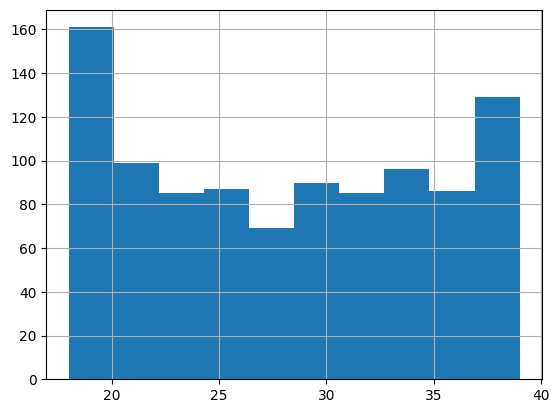

In [172]:
df["Player_Age"].hist()

<Axes: >

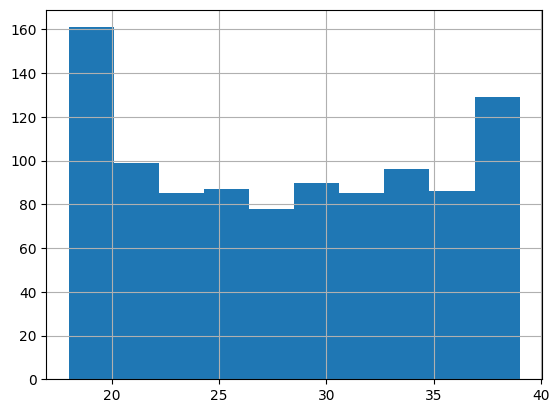

In [173]:
df['Player_Age'] = df['Player_Age'].fillna(df['Player_Age'].median())
df["Player_Age"].hist()

In [174]:
#NONE TOLTI
df.loc[df["Player_Age"].isnull()]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury


In [175]:
df[df.isna().any(axis=1)]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
128,32.0,NaN,NaN,True,NaN,NaN,True


In [176]:
df = df.drop([128])

In [177]:
df.isnull().sum()

Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64

In [178]:
df.shape

(995, 7)

<Axes: >

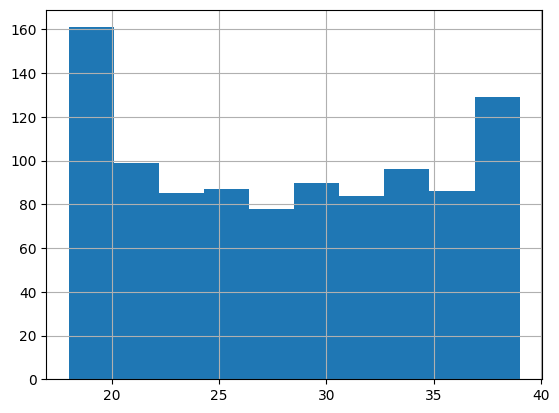

In [179]:
df["Player_Age"].hist()

<Axes: >

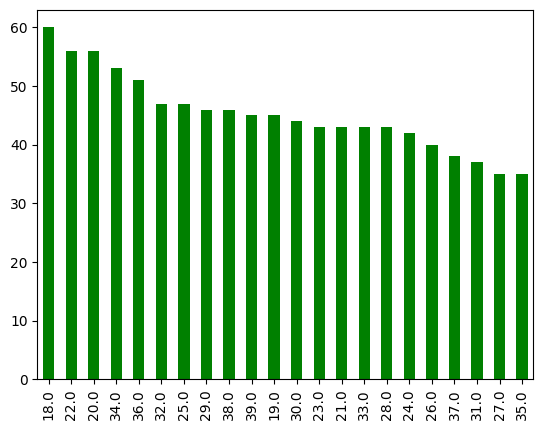

In [180]:
df['Player_Age'].value_counts().plot(kind='bar', color='green')


<Axes: >

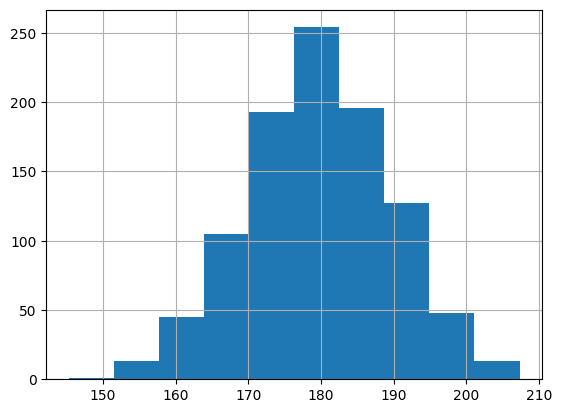

In [181]:
df["Player_Height"].hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


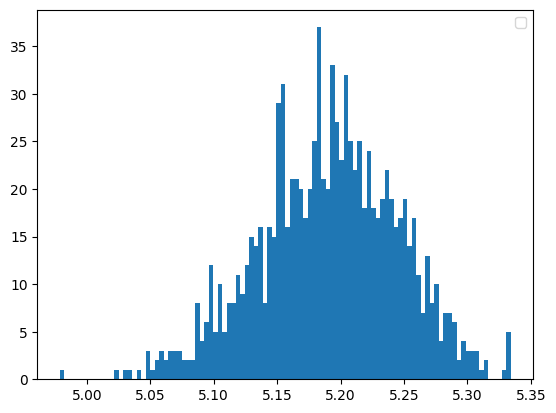

In [182]:
# Apply log transformation to the data
log_data = np.log(df["Player_Height"])

plt.hist(log_data, bins=100, label='')
#plt.hist(df["sellingprice"], bins=100, label='')
plt.legend()
plt.show()

<Axes: >

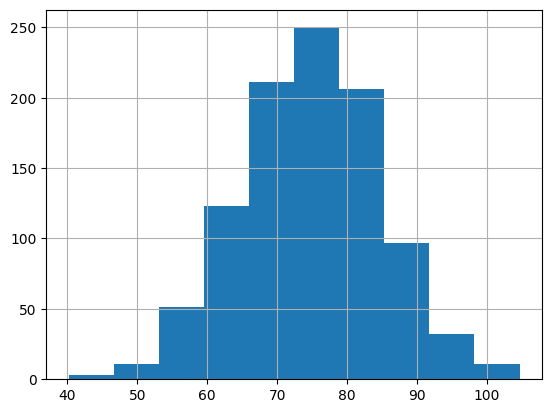

In [183]:
df["Player_Weight"].hist()

<Axes: >

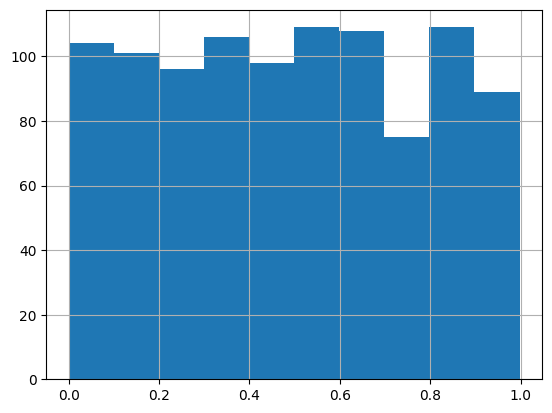

In [184]:
df["Training_Intensity"].hist()

In [185]:
df["Training_Intensity"].describe(x/10 for x in range (10))

count    995.000000
mean       0.490811
std        0.285887
min        0.000031
0%         0.000031
10%        0.096773
20%        0.192774
30%        0.297733
40%        0.394166
50%        0.484021
60%        0.583769
70%        0.676253
80%        0.796498
90%        0.886178
max        0.997749
Name: Training_Intensity, dtype: float64

In [186]:
df["Training_Intensity"].max()

0.9977493890102

In [187]:
df["Training_Intensity"].min()

3.0718845382416e-05

<Axes: >

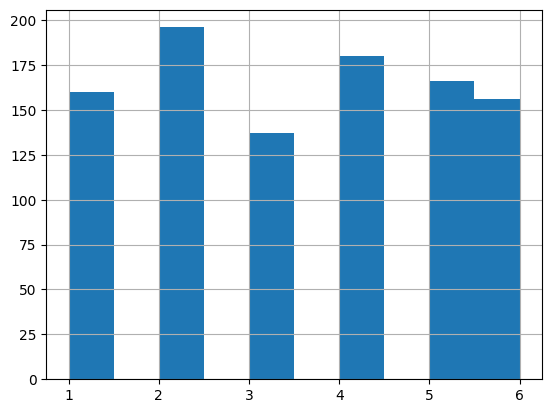

In [188]:
df["Recovery_Time"].hist()

<Axes: ylabel='Likelihood_of_Injury'>

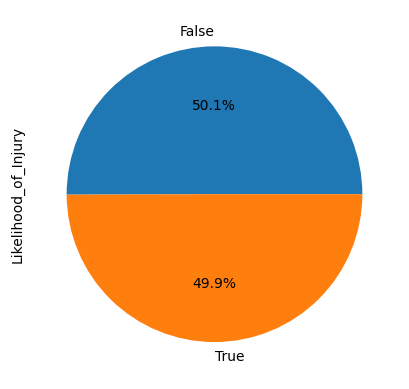

In [189]:
df["Likelihood_of_Injury"].value_counts().plot(autopct='%1.1f%%',kind="pie")

<Axes: ylabel='Previous_Injuries'>

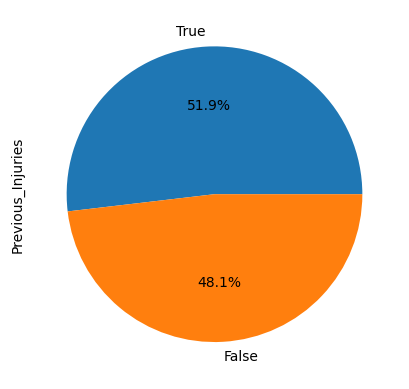

In [190]:
df["Previous_Injuries"].value_counts().plot(autopct='%1.1f%%',kind="pie")

# ANALISI BIVARIATA

In [191]:
df.corr()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
Player_Age,1.000000,-0.038435,0.049504,-0.053506,0.037679,-0.033157,0.002038
Player_Weight,-0.038435,1.000000,0.028684,0.037428,0.045071,-0.062003,0.003291
Player_Height,0.049504,0.028684,1.000000,0.010534,0.047021,0.033645,0.031109
Previous_Injuries,-0.053506,0.037428,0.010534,1.000000,-0.022999,-0.011407,0.033226
Training_Intensity,0.037679,0.045071,0.047021,-0.022999,1.000000,-0.032232,0.093156
Recovery_Time,-0.033157,-0.062003,0.033645,-0.011407,-0.032232,1.000000,-0.012748
Likelihood_of_Injury,0.002038,0.003291,0.031109,0.033226,0.093156,-0.012748,1.000000


<Axes: >

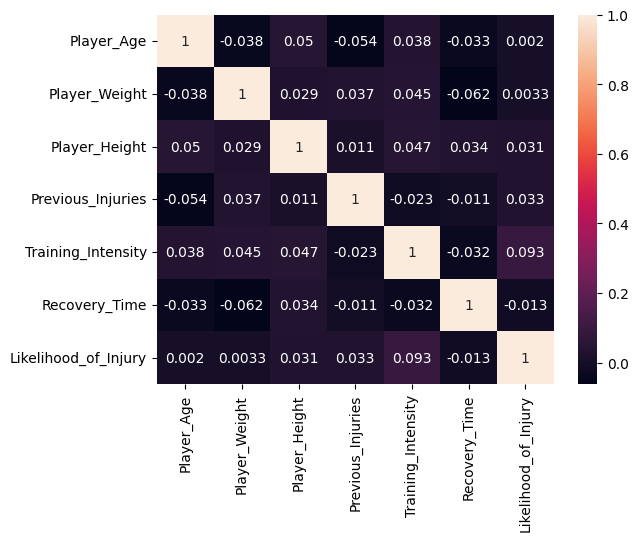

In [192]:
sns.heatmap(df.corr(), annot=True)

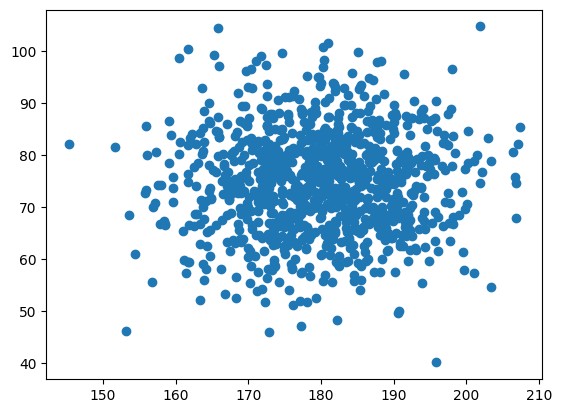

In [193]:
plt.scatter(x=df["Player_Height"],y=df["Player_Weight"])

In [194]:
#COLONNA DEL BMI
df["Player_BMI"] = df["Player_Weight"]/((df["Player_Height"]/100)**2)
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Player_BMI
0,24.0,66.251933,175.732429,True,0.457929,5.0,False,21.453331
1,37.0,70.996271,174.581650,False,0.226522,6.0,True,23.293693
2,32.0,80.093781,186.329618,False,0.613970,2.0,True,23.069332
3,28.0,87.473271,175.504240,True,0.252858,4.0,True,28.398810
5,38.0,75.820549,206.631824,True,0.359209,4.0,False,17.757937
...,...,...,...,...,...,...,...,...
995,23.0,99.147910,165.290912,False,0.077857,3.0,True,36.289886
996,23.0,75.799934,178.132281,True,0.955448,1.0,False,23.888208
997,20.0,78.479061,173.823908,False,0.246961,1.0,True,25.973757
998,24.0,66.915802,197.616889,True,0.859645,2.0,False,17.134860


<Axes: >

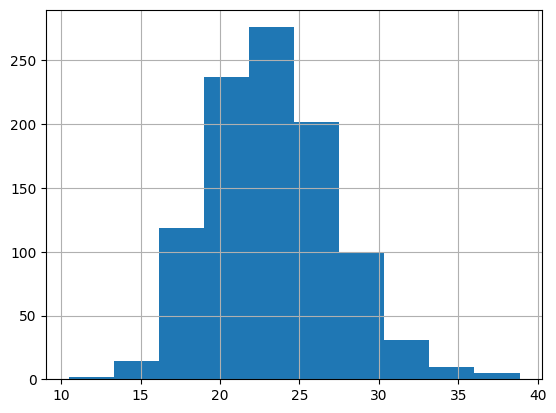

In [195]:
df["Player_BMI"].hist()

<Axes: >

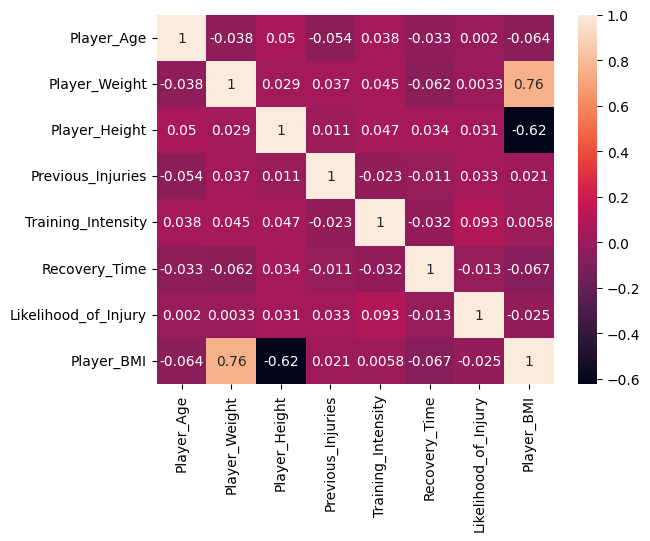

In [196]:
sns.heatmap(df.corr(), annot=True)

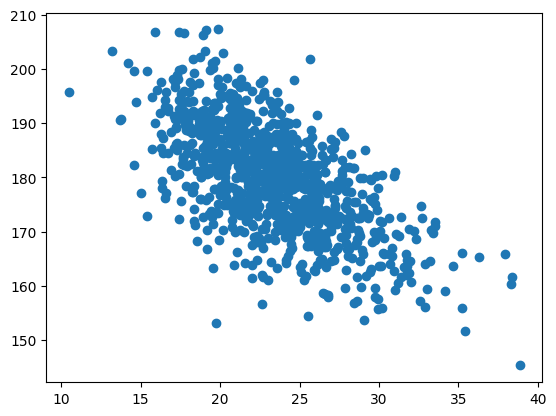

In [197]:
plt.scatter(x=df["Player_BMI"],y=df["Player_Height"])

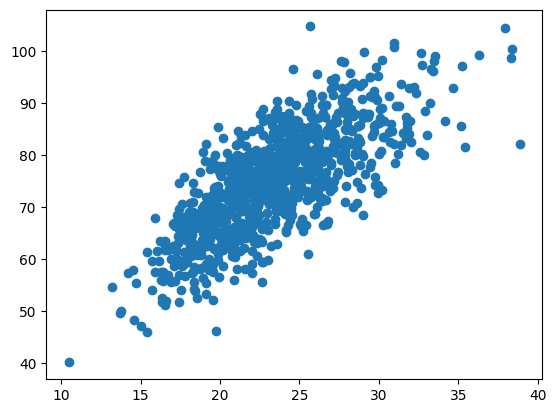

In [198]:
plt.scatter(x=df["Player_BMI"],y=df["Player_Weight"])

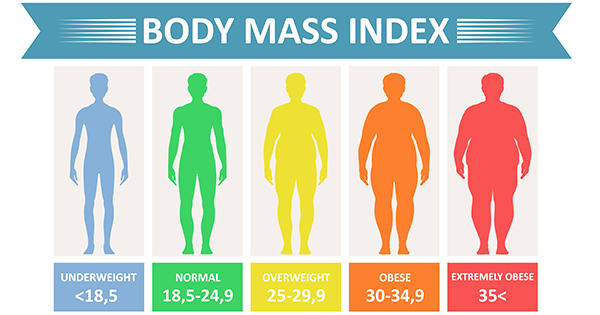

In [207]:
gaps = [0, 18.5, 24.9, 29.9, 34.9, df["Player_BMI"].max()+1]
categories = ['Sottopeso', 'Normale', 'Sovrappeso', 'Obeso', 'Gravemente obeso']


df['BMI_Classification'] = pd.cut(df['Player_BMI'], bins=gaps, labels=categories, right=False)

In [208]:
df["BMI_Classification"].value_counts()

Normale             570
Sovrappeso          259
Sottopeso           105
Obeso                53
Gravemente obeso      8
Name: BMI_Classification, dtype: int64

In [209]:
df["BMI_Class_Cut"]=df["BMI_Classification"].map({"Sottopeso":1,"Normale":2,"Sovrappeso":3,"Obeso":4,"Gravemente obeso":5})
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Player_BMI,BMI_Classification,BMI_Class_Cut
0,24.0,66.251933,175.732429,True,0.457929,5.0,False,21.453331,Normale,2
1,37.0,70.996271,174.581650,False,0.226522,6.0,True,23.293693,Normale,2
2,32.0,80.093781,186.329618,False,0.613970,2.0,True,23.069332,Normale,2
3,28.0,87.473271,175.504240,True,0.252858,4.0,True,28.398810,Sovrappeso,3
5,38.0,75.820549,206.631824,True,0.359209,4.0,False,17.757937,Sottopeso,1
...,...,...,...,...,...,...,...,...,...,...
995,23.0,99.147910,165.290912,False,0.077857,3.0,True,36.289886,Gravemente obeso,5
996,23.0,75.799934,178.132281,True,0.955448,1.0,False,23.888208,Normale,2
997,20.0,78.479061,173.823908,False,0.246961,1.0,True,25.973757,Sovrappeso,3
998,24.0,66.915802,197.616889,True,0.859645,2.0,False,17.134860,Sottopeso,1


In [210]:
df["BMI_Class_Cut"]=df["BMI_Class_Cut"].astype(int)

In [212]:
df[["BMI_Class_Cut","Player_Height"]].corr()

,BMI_Class_Cut,Player_Height
BMI_Class_Cut,1.000000,-0.589648
Player_Height,-0.589648,1.000000


In [213]:
df[["BMI_Class_Cut","Likelihood_of_Injury"]].corr()

,BMI_Class_Cut,Likelihood_of_Injury
BMI_Class_Cut,1.000000,-0.031574
Likelihood_of_Injury,-0.031574,1.000000


<Axes: xlabel='BMI_Classification', ylabel='Player_Age'>

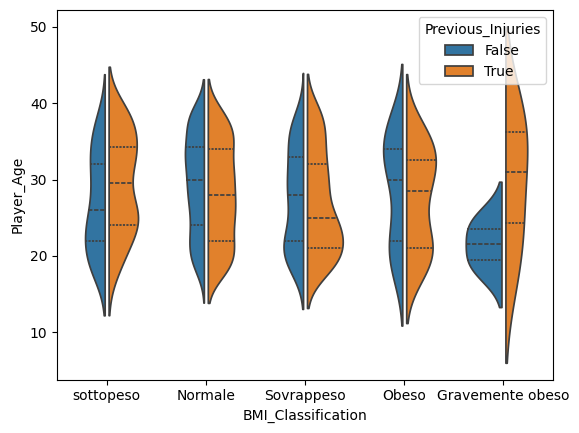

In [68]:
sns.violinplot(data=df, x="BMI_Classification", y="Player_Age", hue="Previous_Injuries", split=True, gap=.1, inner="quart")


<Axes: xlabel='BMI_Classification', ylabel='Player_Age'>

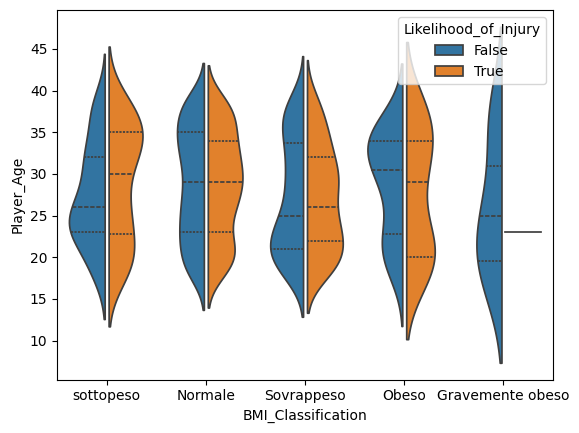

In [69]:
sns.violinplot(data=df, x="BMI_Classification", y="Player_Age", hue="Likelihood_of_Injury", split=True, gap=.1, inner="quart")


In [215]:
df.loc[(df["BMI_Classification"] == "Gravemente obeso")]

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Player_BMI,BMI_Classification,BMI_Class_Cut
46,19.0,100.386911,161.692316,True,0.550663,2.0,False,38.397092,Gravemente obeso,5
193,18.0,85.622099,155.972461,False,0.149249,3.0,False,35.195733,Gravemente obeso,5
262,25.0,98.573764,160.406098,False,0.603150,4.0,False,38.310656,Gravemente obeso,5
484,36.0,81.489242,151.674804,True,0.296326,2.0,False,35.422026,Gravemente obeso,5
511,26.0,104.377528,165.874642,True,0.672251,1.0,False,37.935605,Gravemente obeso,5
657,20.0,82.013731,145.285701,False,0.949273,6.0,False,38.854455,Gravemente obeso,5
908,37.0,97.142515,165.993260,True,0.920691,1.0,False,35.255626,Gravemente obeso,5
995,23.0,99.147910,165.290912,False,0.077857,3.0,True,36.289886,Gravemente obeso,5


In [70]:
'''dfp = df.pivot_table(index='BMI_Classification', columns='Previous_Injuries', values='Previous_Injuries', aggfunc='size')

# plot
dfp.plot(kind='bar', rot=0)
plt.show()'''


"dfp = df.pivot_table(index='BMI_Classification', columns='Previous_Injuries', values='Previous_Injuries', aggfunc='size')\n\n# plot\ndfp.plot(kind='bar', rot=0)\nplt.show()"

In [71]:
gaps_2 = [-float('inf'), 0.2, 0.4, 0.6, 0.8, float('inf')]
categories_2 = ['non si allena', 'poco', 'abbastanza', 'molto', 'moltissimo']


df['Training_Classification'] = pd.cut(df['Training_Intensity'], bins=gaps_2, labels=categories_2, right=False)

<Axes: xlabel='Training_Classification', ylabel='Player_Age'>

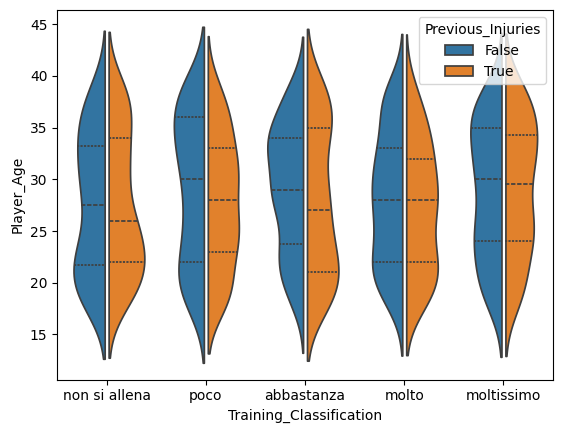

In [72]:
sns.violinplot(data=df, x="Training_Classification", y="Player_Age", hue="Previous_Injuries", split=True, gap=.1, inner="quart")


<Axes: xlabel='Training_Classification', ylabel='Player_Age'>

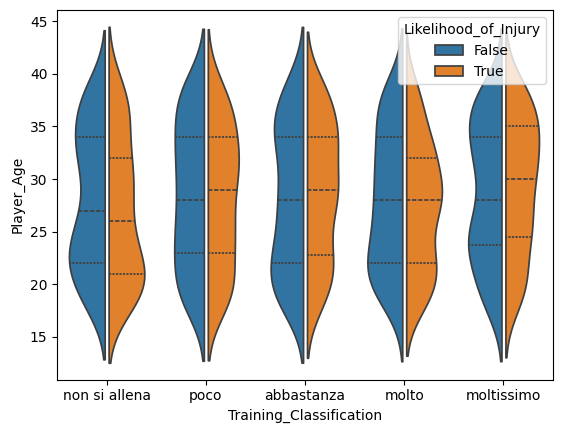

In [73]:
sns.violinplot(data=df, x="Training_Classification", y="Player_Age", hue="Likelihood_of_Injury", split=True, gap=.1, inner="quart")

In [82]:
gaps_3 = [-float('inf'), 22, 27, 31, 35,float('inf')]
categories_3 = ['18-22', '23-27', '28-31', '31-35', '35+']

# Create "BMI_Classification" column 
df['Age_Classification'] = pd.cut(df['Player_Age'], bins=gaps_3, labels=categories_3, right=False)

<Axes: xlabel='Age_Classification', ylabel='Training_Classification'>

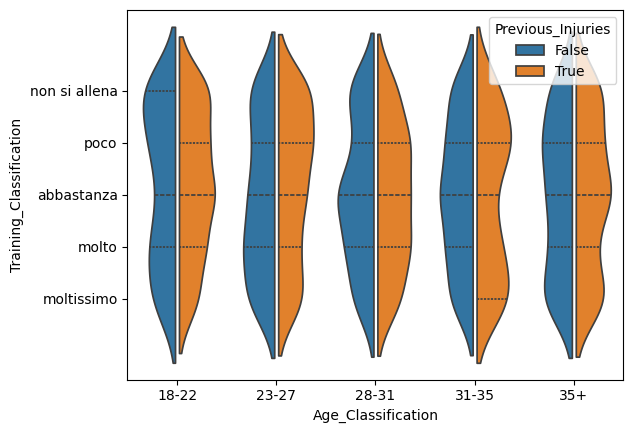

In [75]:
sns.violinplot(data=df, x="Age_Classification", y="Training_Classification", hue="Previous_Injuries", split=True, gap=.1, inner="quart")


<Axes: xlabel='Age_Classification', ylabel='Training_Classification'>

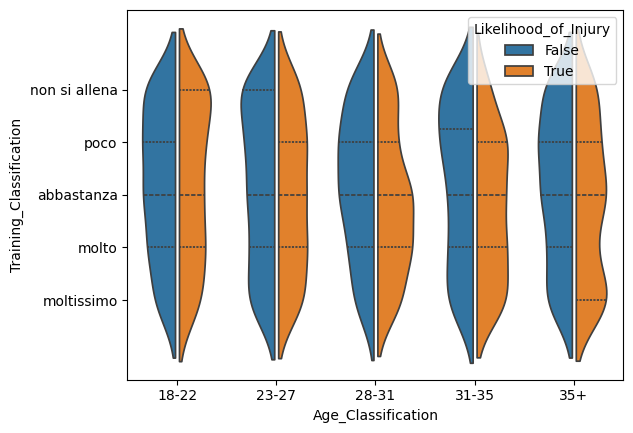

In [76]:
sns.violinplot(data=df, x="Age_Classification", y="Training_Classification", hue="Likelihood_of_Injury", split=True, gap=.1, inner="quart")

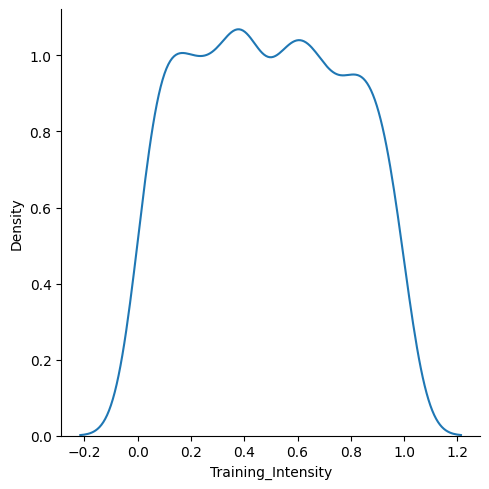

In [77]:
sns.displot(df, x="Training_Intensity", kind="kde")

<Axes: >

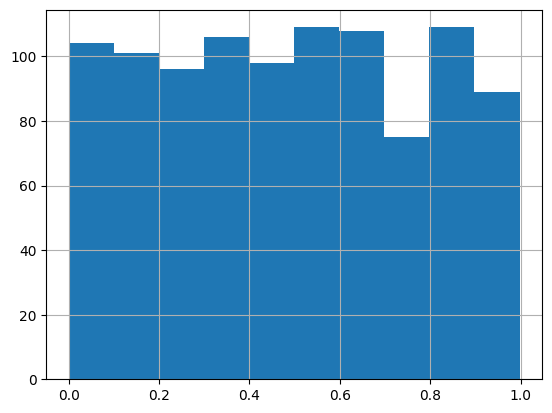

In [216]:
df["Training_Intensity"].hist()

<Axes: xlabel='Training_Intensity', ylabel='Density'>

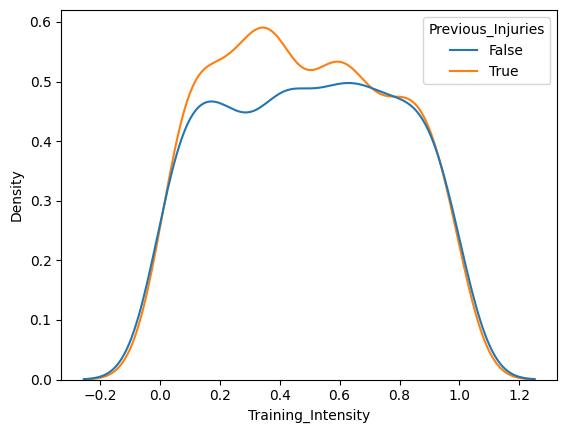

In [78]:
sns.kdeplot(data=df, x='Training_Intensity', hue='Previous_Injuries')


In [217]:
df.groupby("Likelihood_of_Injury").Training_Intensity.mean()

Likelihood_of_Injury
False    0.464219
True     0.517456
Name: Training_Intensity, dtype: float64

<Axes: xlabel='Training_Intensity', ylabel='Density'>

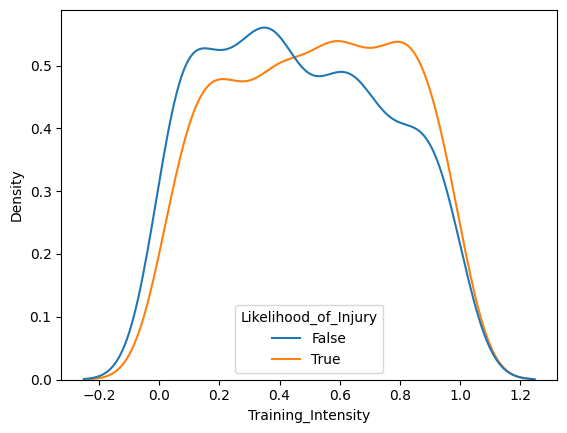

In [79]:
sns.kdeplot(data=df, x='Training_Intensity', hue='Likelihood_of_Injury')

<Axes: xlabel='Training_Intensity', ylabel='Density'>

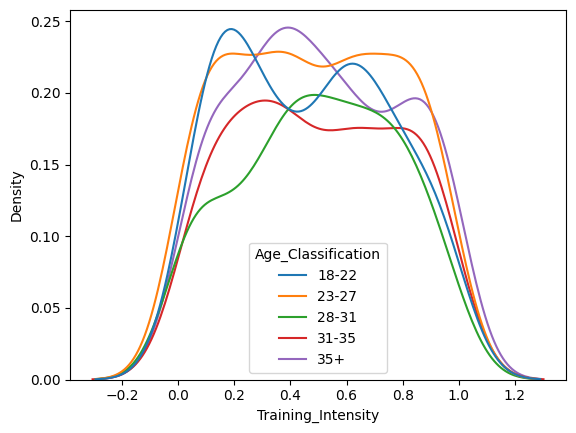

In [229]:
sns.kdeplot(data=df, x='Training_Intensity', hue='Age_Classification')

/var/folders/r_/fs8t89rd1mzfn7vs0ld413940000gn/T/ipykernel_3551/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

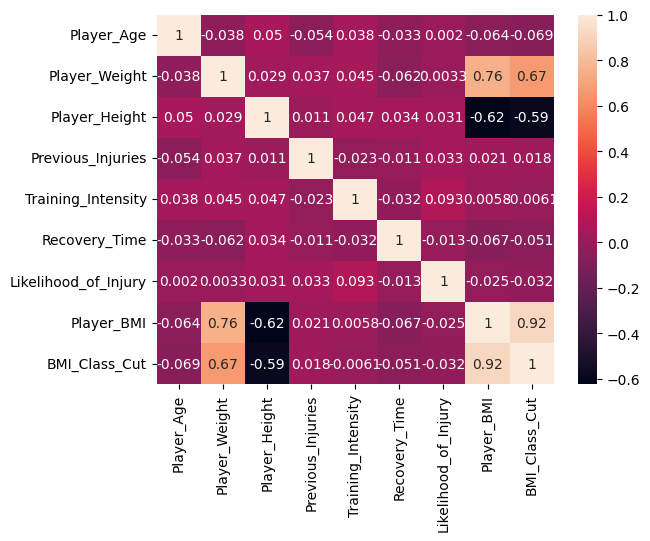

In [218]:
sns.heatmap(df.corr(), annot=True)

<Figure size 300x500 with 0 Axes>

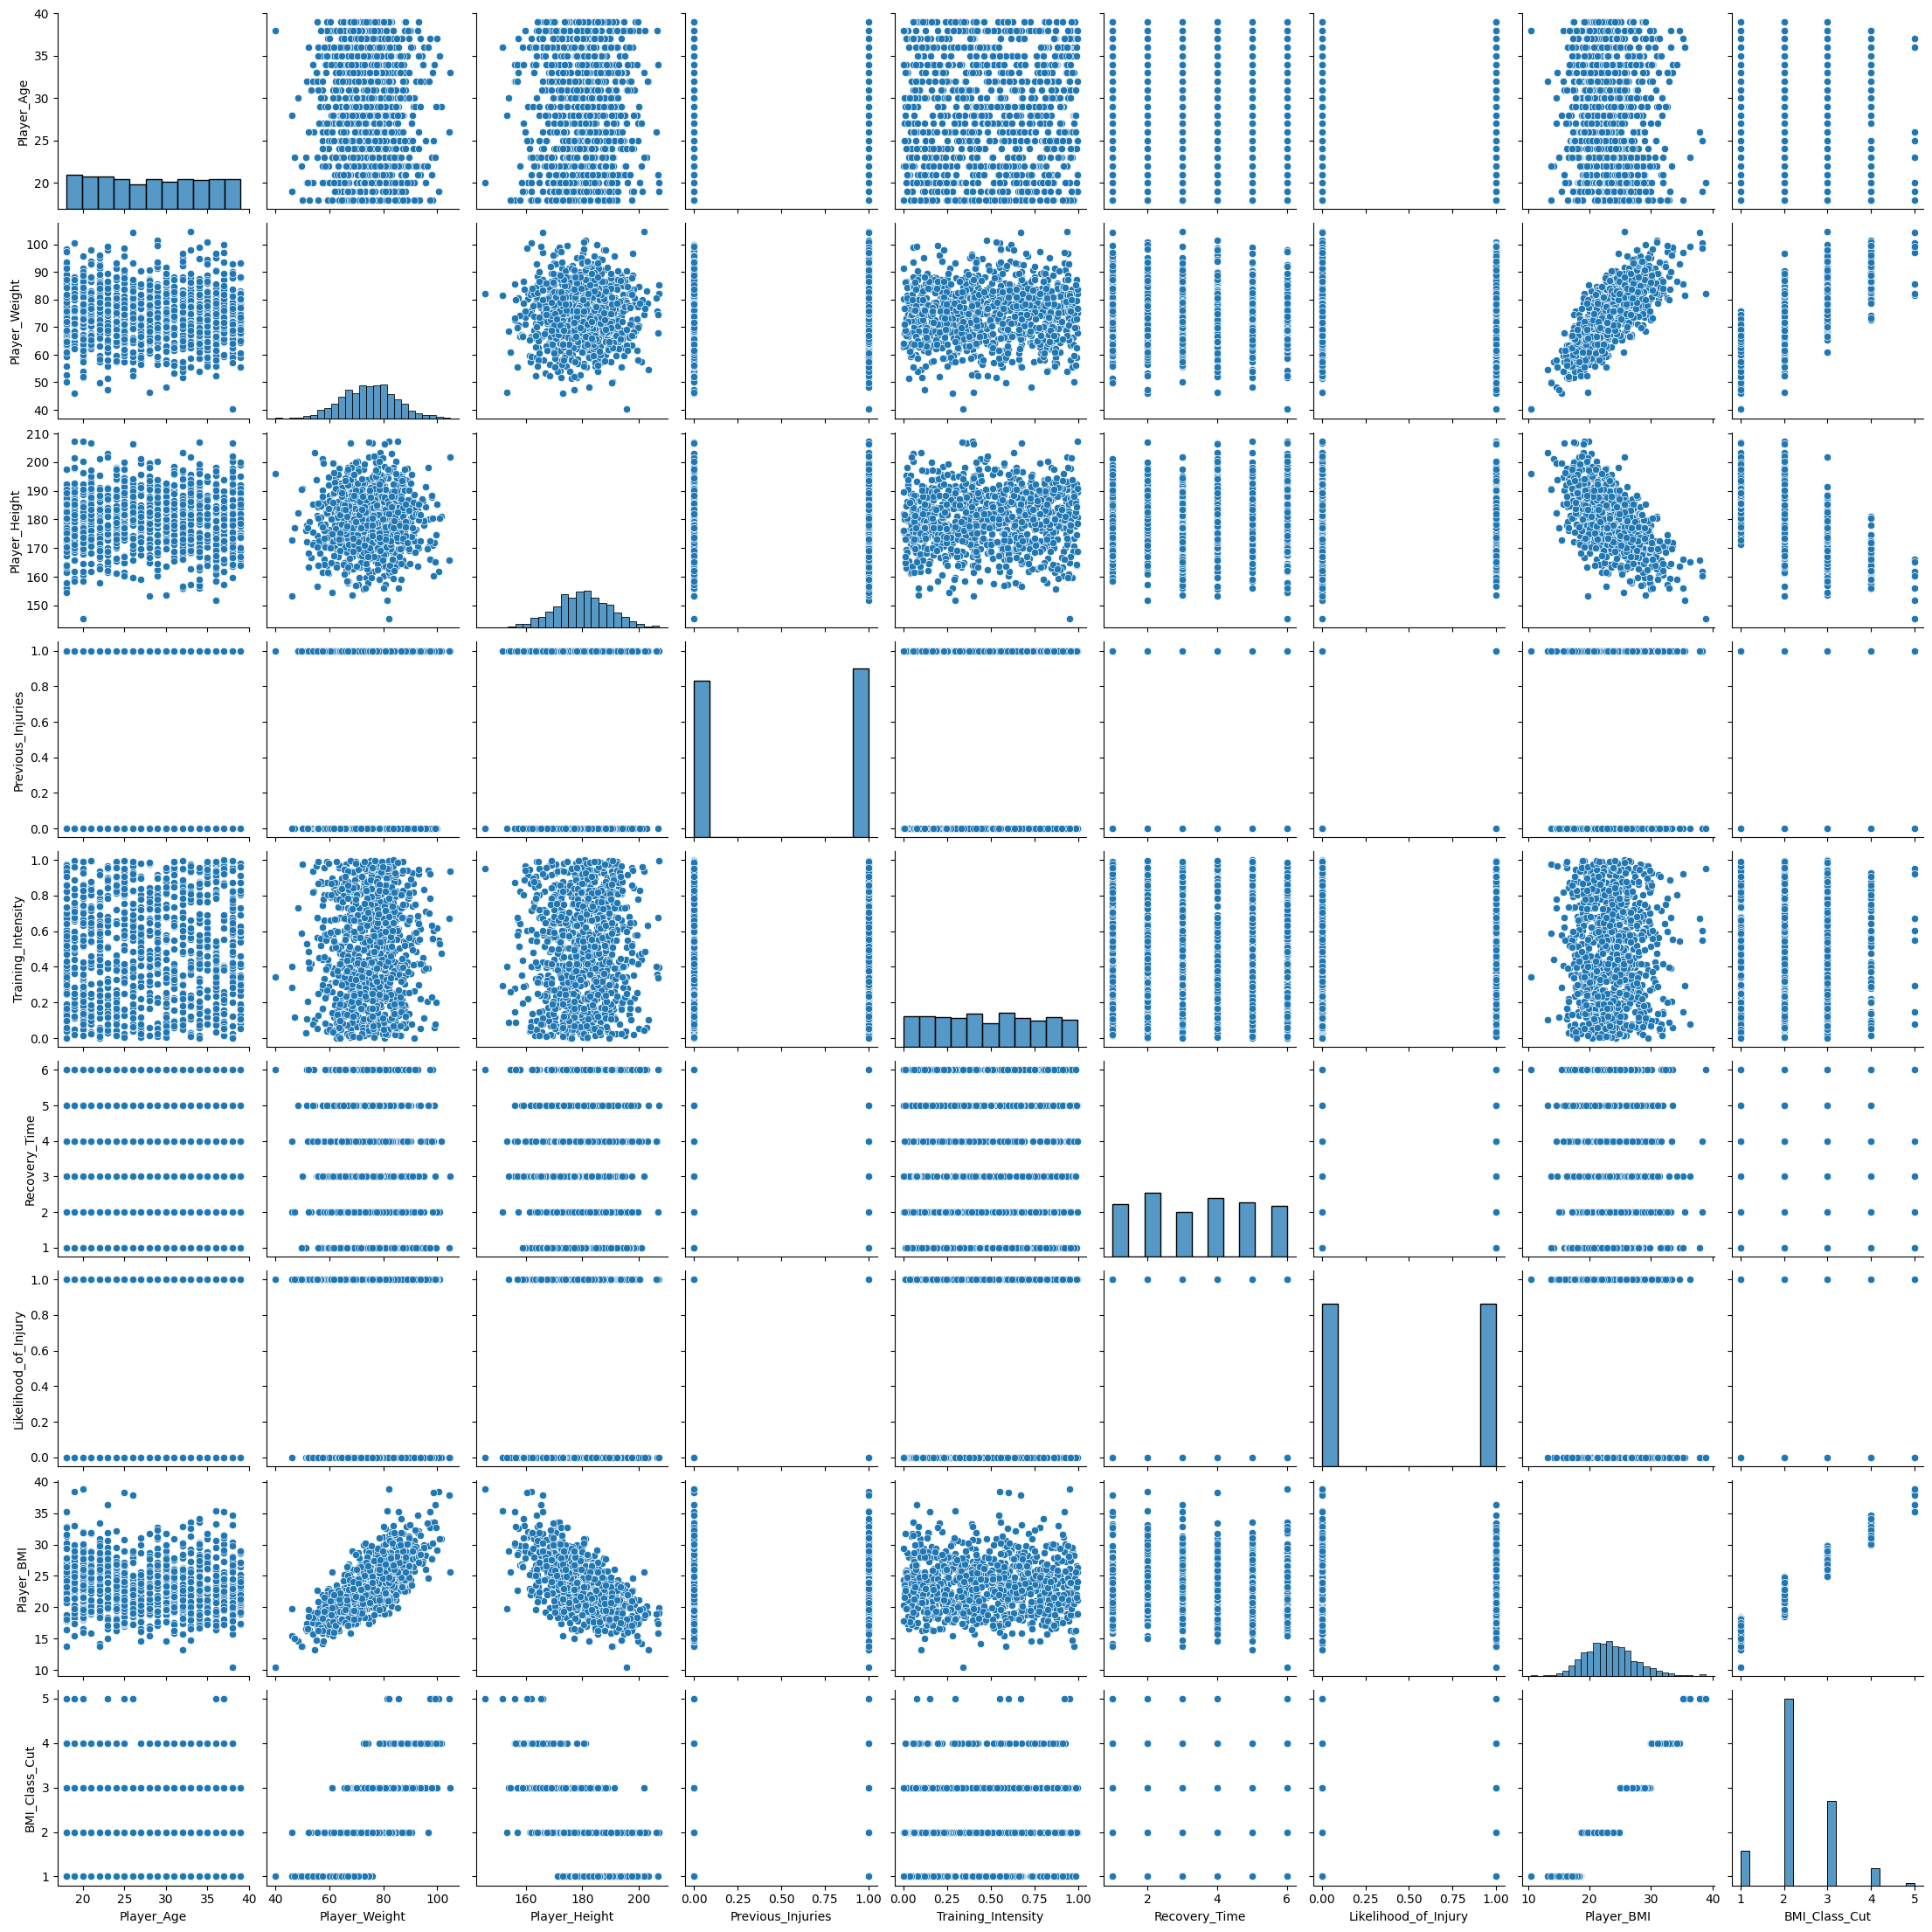

In [226]:
plt.figure(figsize=(3,5))
sns.pairplot(df)
plt.show()